### The Dataset

In this week's assignment, you will work on weather data. The goal is to find classify the weather being high_humidity or not based on other weather conditions. 

Here is a pre-processed version of the [dataset](https://drive.google.com/file/d/11mKR0uGIk8ZCG2jmk0m_GxiYPLq6rAfc/view?usp=share_link)




### Importing Libraries

#### We will start by importing Python libraries used in the analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

Load the dataset into a dataframe `df`.

In [2]:
url = 'https://drive.google.com/file/d/11mKR0uGIk8ZCG2jmk0m_GxiYPLq6rAfc/view'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)

### Importing Machine Learning Libraries

You will need to import several machine learning libraries for performing different tasks in this assignment. Update this cell with each import and re-run it to update your notebook. 

In [3]:
# Run this cell
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### 1. Understanding the Data

##### Get information about the various columns of the dataframe using head, describe and info methods of dataframes. [1 pt]

In [4]:
df.head()

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,high_humidity_label
0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,1
1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,0
2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,0
3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,0
4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,1


In [5]:
df.describe()

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,high_humidity_label
count,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000
mean,918.903180,65.022609,142.306756,5.485793,148.480424,6.999714,0.182023,266.393697,0.497180
std,3.179040,11.168033,69.149472,4.534427,67.154911,5.590790,1.534493,1503.092216,0.500227
min,907.990000,36.752000,15.500000,0.693451,28.900000,1.185578,0.000000,0.000000,0.000000
25%,916.595376,57.398000,65.979244,2.245529,76.335351,3.064608,0.000000,0.000000,0.000000
50%,918.942281,65.778479,165.937461,3.869906,176.350000,4.943637,0.000000,0.000000,0.000000
75%,921.169054,73.530872,191.100000,7.264463,201.125000,8.747888,0.000000,0.000000,1.000000
max,929.320000,98.906000,343.400000,23.554978,312.200000,29.840780,24.020000,17704.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   air_pressure_9am        1064 non-null   float64
 1   air_temp_9am            1064 non-null   float64
 2   avg_wind_direction_9am  1064 non-null   float64
 3   avg_wind_speed_9am      1064 non-null   float64
 4   max_wind_direction_9am  1064 non-null   float64
 5   max_wind_speed_9am      1064 non-null   float64
 6   rain_accumulation_9am   1064 non-null   float64
 7   rain_duration_9am       1064 non-null   float64
 8   high_humidity_label     1064 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 74.9 KB


Label encoding of the target variable is not required as it is already encoded. Also, sklearn's decision trees are capable of working with target variables that are not encoded.

### 2. Generate a [histogram graph for counts for all values](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html). 
Set the figsize parameter to a suitable size for readability. You need not plot each histogram individually. Instead use the provided reference to plot the distributions together. [0.5 pt]

array([[<AxesSubplot:title={'center':'air_pressure_9am'}>,
        <AxesSubplot:title={'center':'air_temp_9am'}>,
        <AxesSubplot:title={'center':'avg_wind_direction_9am'}>],
       [<AxesSubplot:title={'center':'avg_wind_speed_9am'}>,
        <AxesSubplot:title={'center':'max_wind_direction_9am'}>,
        <AxesSubplot:title={'center':'max_wind_speed_9am'}>],
       [<AxesSubplot:title={'center':'rain_accumulation_9am'}>,
        <AxesSubplot:title={'center':'rain_duration_9am'}>,
        <AxesSubplot:title={'center':'high_humidity_label'}>]],
      dtype=object)

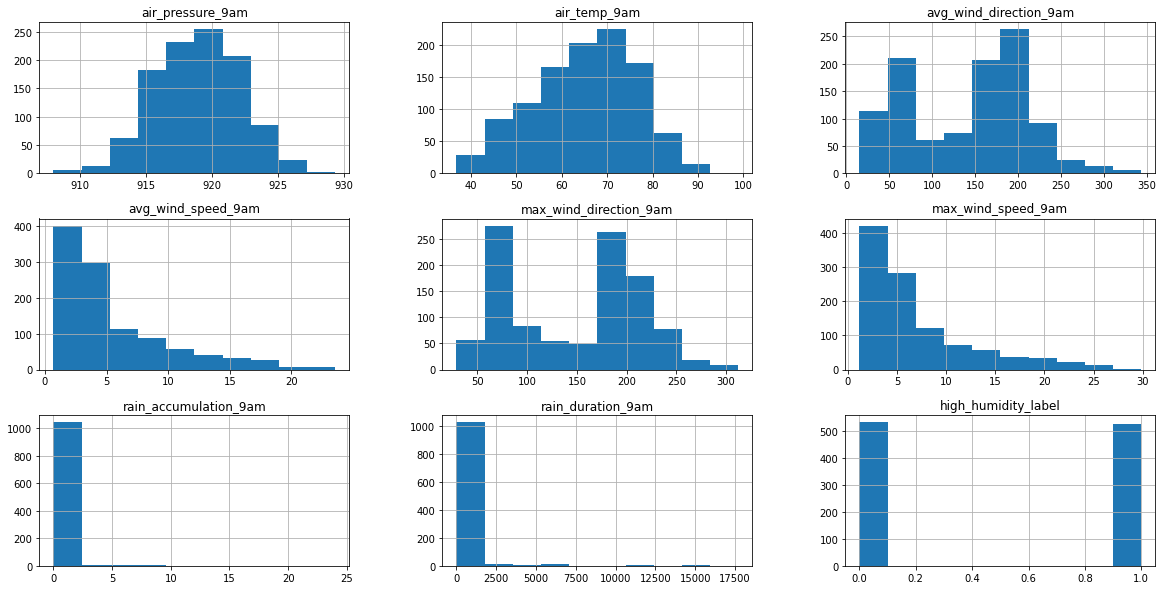

In [7]:
df.hist(figsize=(20,10))

### 3. Preparing the input fields and target variable [0.5 pt]

1. We want to create a dataframe of features `X` without the labels.
2. We want to remove the target variable `label` and store it another dataframe `y`. 



In [8]:
X = df.drop(columns = ['high_humidity_label'])
y= df['high_humidity_label']

### 4. Defining the model [0.5 pt]

Import and Create a [Decision Tree Classifier model](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) called `clf` with - 

1. maximum number of leaf nodes equal to number of input features i.e. len(X.columns)
2. Random state = 0

In [9]:
clf = tree.DecisionTreeClassifier(max_leaf_nodes = len(X.columns) , random_state = 0)

### 5. Preparing train and test sets [0.5 pt]

Split data into training(80%) and test(20%) set using [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Assign some value of random_state. 

After this step, you should have 4 dataframes - `X_train, X_test, y_train, y_test`.

In [10]:
X_train, X_test , y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=100)

### 6. Fit the classifier defined in step 4  on the training data (X_train, y_train) [0.5 pt]

In [11]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=8, random_state=0)

### 7. Generate predictions 

7.1 Generate a list `predictions_train` containing all the grade predictions for the train set [0.5 pt]

In [12]:
predictions_train = clf.predict(X_train)

7.2 Generate a list `predictions_test` containing all the grade predictions for the test set [0.5 pt]

In [13]:
predictions_test = clf.predict(X_test)

### 8. Calculate accuracy 

8.1 Find the [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) of **train** set for your model using above predictions. (Make sure you have imported the library) [0.5 pt]

In [14]:
accuracy_score(y_true = y_train, y_pred=predictions_train)

0.8213866039952996

8.2 Find the accuracy of test set for your model using above predictions. [0.5 pt]

In [15]:
accuracy_score(y_true = y_test, y_pred=predictions_test)

0.7652582159624414

8.3 Which accuracy (test or train) is higher? Why? [0.5 pt]

The accuracy of the train set is higher. Training accuracy means that data features such as pressure,temperature and wind are used both for training and testing, while test accuracy represents that the trained model tries to predict the high humidity. The model has been trained with the trained dataset (80%), and has not seen the test dataset (20%). There might be some differences that the trained model did not learn from the patterns in the testing dataset(20%). 

8.4 Using the [Plot Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html) method from sklearn to plot the decision tree

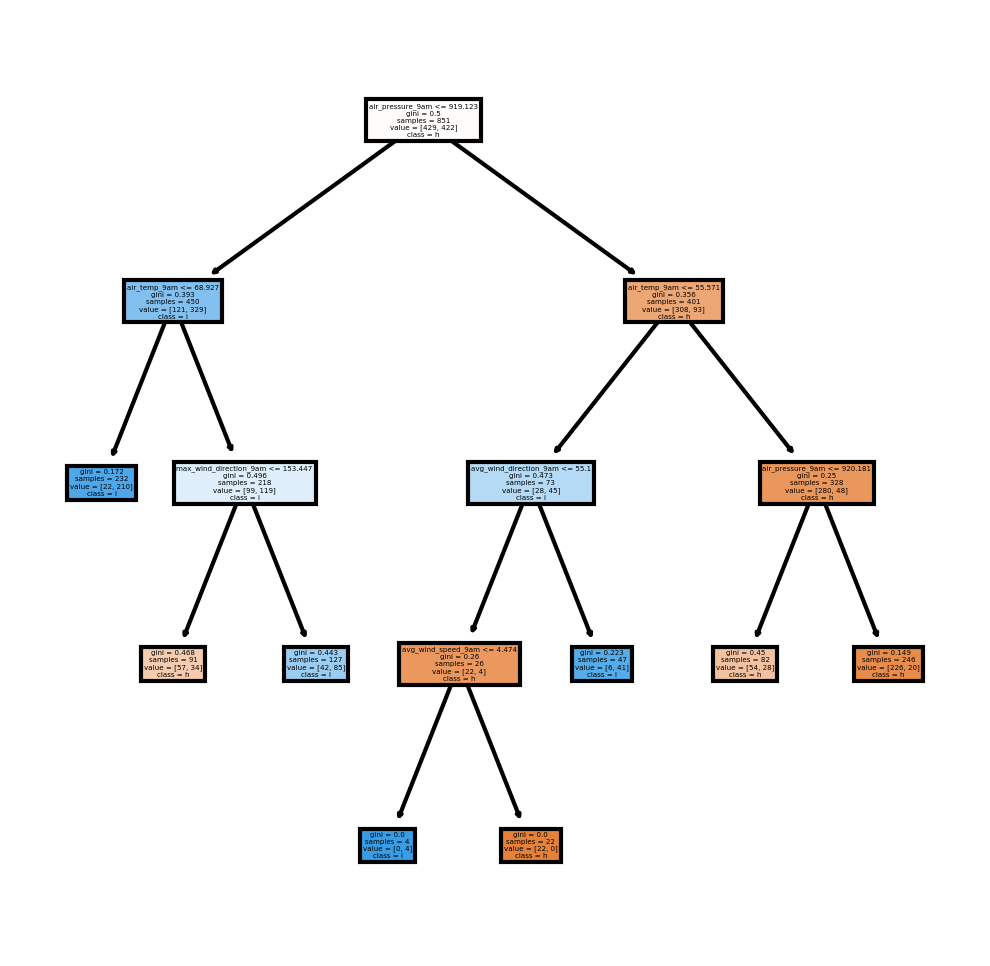

In [16]:
# Run this cell to visualize the decision tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,
               feature_names = X.columns, 
               class_names = 'high_humidity_label',
               filled = True);

## Random Forest Classifier

### 9. Import and create a Random Forest Classfier using the same training and test data. [1 pt]
1. Import sklearn's RandomForestClassifier
2. Define the model and assign it to `clf`
3. Fit the model on the train set

In [17]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state = 0)
clf.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

### 10. Generate predictions

10.1 Find the predictions on the test set using RandomForestClassifier model. Print the accuracy on the test set. [1 pt]

In [18]:
predictions = clf.predict(X_test)
accuracy_score(y_true = y_test, y_pred= predictions)

0.8309859154929577

10.2 Does the accuracy(on test set) of your classifier increase over Decision Tree? Why? [0.5 pt]

Yes, the test set for the Random Forest Classifier increases compared to the Decision Tree. Random Forest Classifier consists of many Decision Trees which help increase its accuracy. The accuracy of the classifier is higher, but it is also more expensive to conduct. 

### 11. Feature Importance

11.1 Calculate [feature importance](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_) as calculated by your Random Forest Classifier. [0.5 pt]

11.2 Plot a horizontal bar graph and list the top 3 important features. (X-Axis : Importance, Y-axis: Feature). Make sure your graph has axis labels, title etc. [1 pt]

Expected result shown below (The y-axis label has been hidden intentionally).

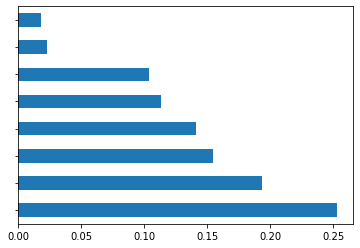

Text(0, 0.5, 'Feature')

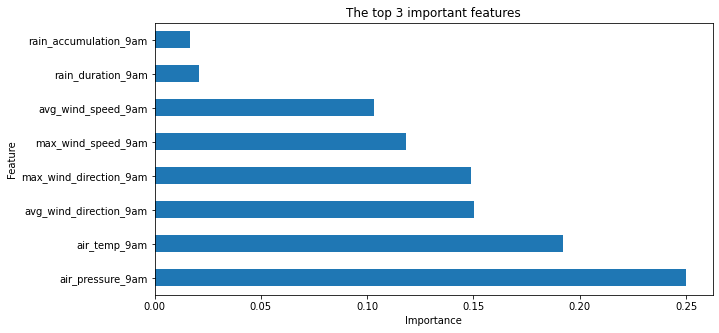

In [19]:
clf.feature_importances_
feat_importances= pd.Series(clf.feature_importances_, index=X.columns )
feat_importances.nlargest(8).plot(kind='barh',figsize = (10,5))
plt.title('The top 3 important features')
plt.xlabel('Importance')
plt.ylabel('Feature')

The top 3 features are air_pressure, air_temp and avg_wind_direction. 